In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Task 1

This notebook is designed for both annotators (students) and reviewers (students, mentors, or clients).

For Annotators: Before submitting your labels, use this notebook to verify them. This ensures they meet all requirements and are ready for review.

For Reviewers: Use this notebook to evaluate the labels. Approve labels that meet all criteria. If any labels do not satisfy the requirements, return them to the annotator with specific feedback on which criteria were not met.

- Requirement 1: Follow the naming convention
- Requirement 2: The shape of the image and the masks should match
- Requirement 3: Masks should be binary images with 0 and 1
- Requirement 4: 0 is the background and 1 is the foreground
- Requirement 5: Good enough label quality

In [2]:
image_path = 'train_Alican_243552_im1.png'
shoot_mask_path = 'train_Alican_243552_im1_shoot_mask.tif'
seed_mask_path = 'train_Alican_243552_im1_seed_mask.tif'
root_mask_path = 'train_Alican_243552_im1_root_mask.tif'

In [3]:
im = cv2.imread(image_path, 0)
im.shape

(3006, 4202)

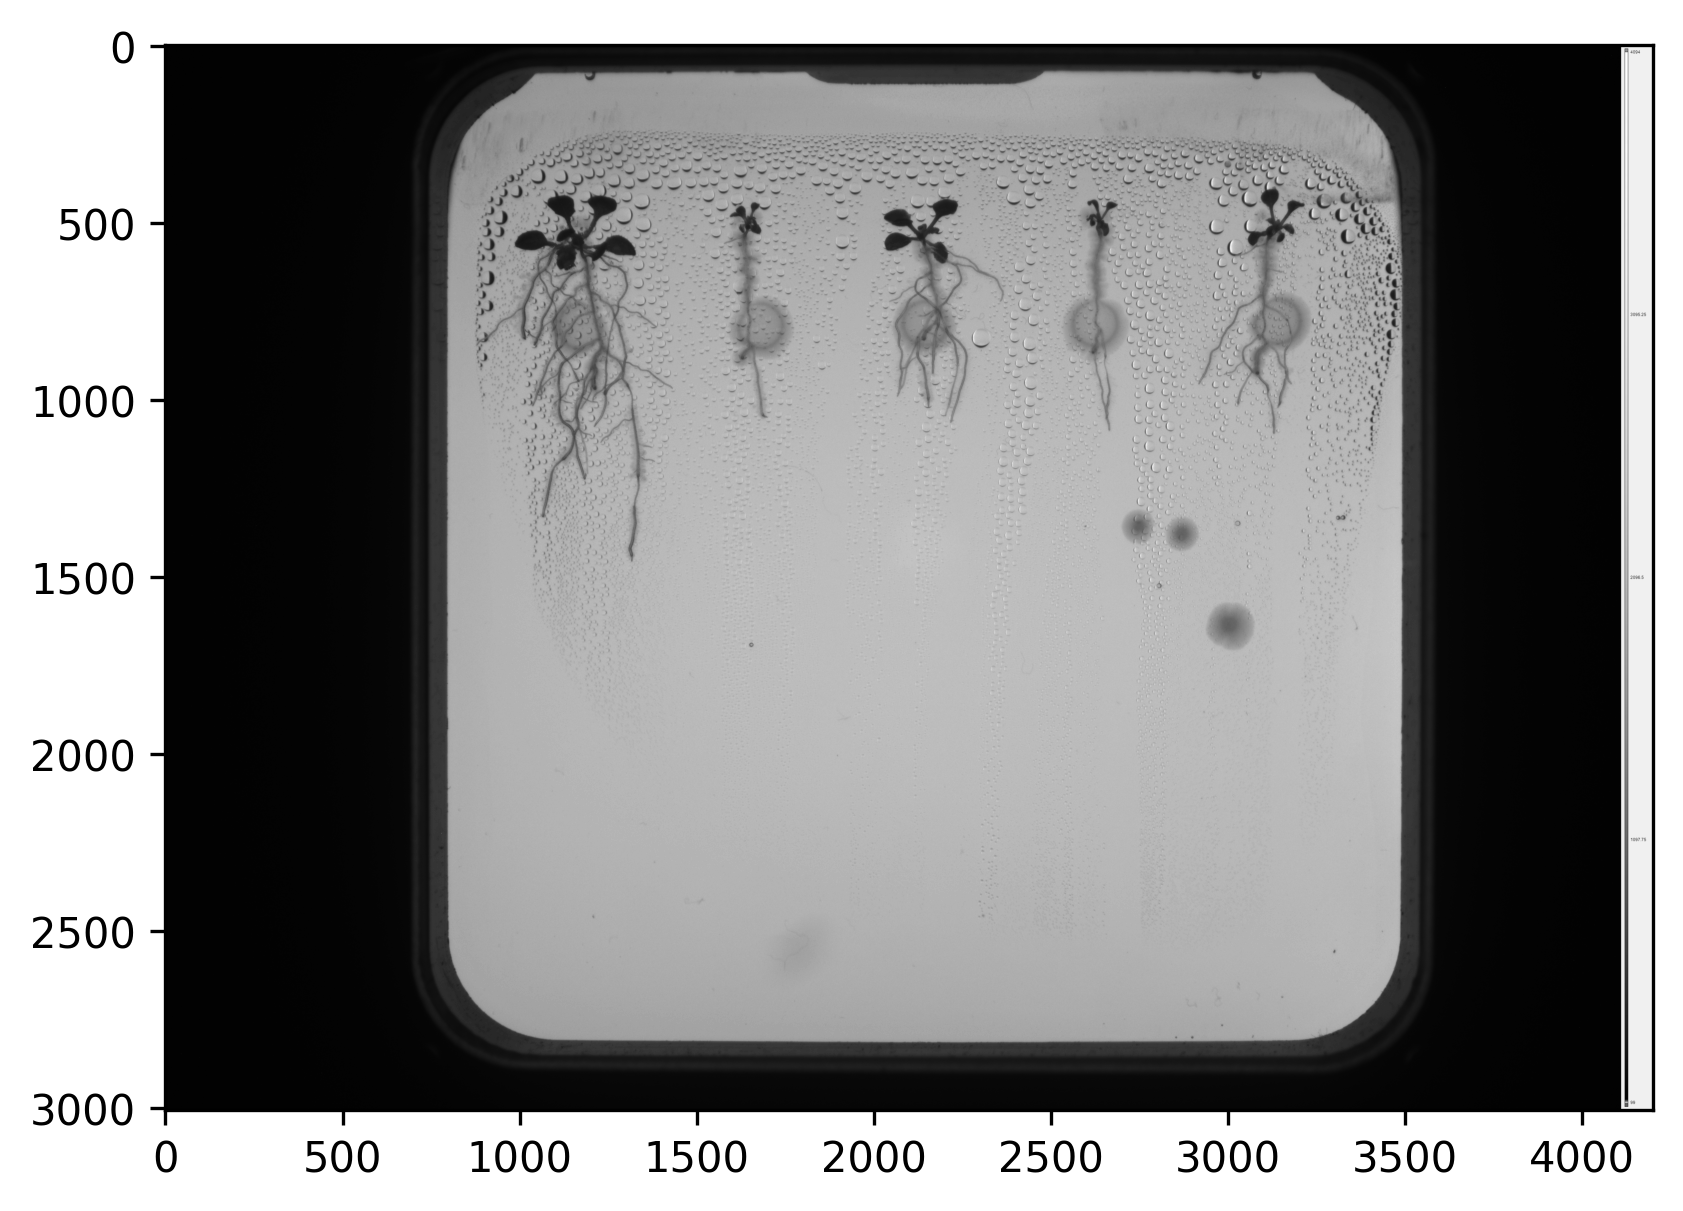

In [4]:
plt.figure(dpi=300)
plt.imshow(im, cmap='gray')

### Deliverables

Each student needs to label 5 images, and deliver 3 mask for each image.

1. One for the shoot pixels
2. One for the seed pixels
3. One for the root pixels

In [5]:
shoot_mask = cv2.imread(shoot_mask_path, 0)
seed_mask = cv2.imread(seed_mask_path, 0)
root_mask = cv2.imread(root_mask_path, 0)

Text(0.5, 1.0, 'Root Mask')

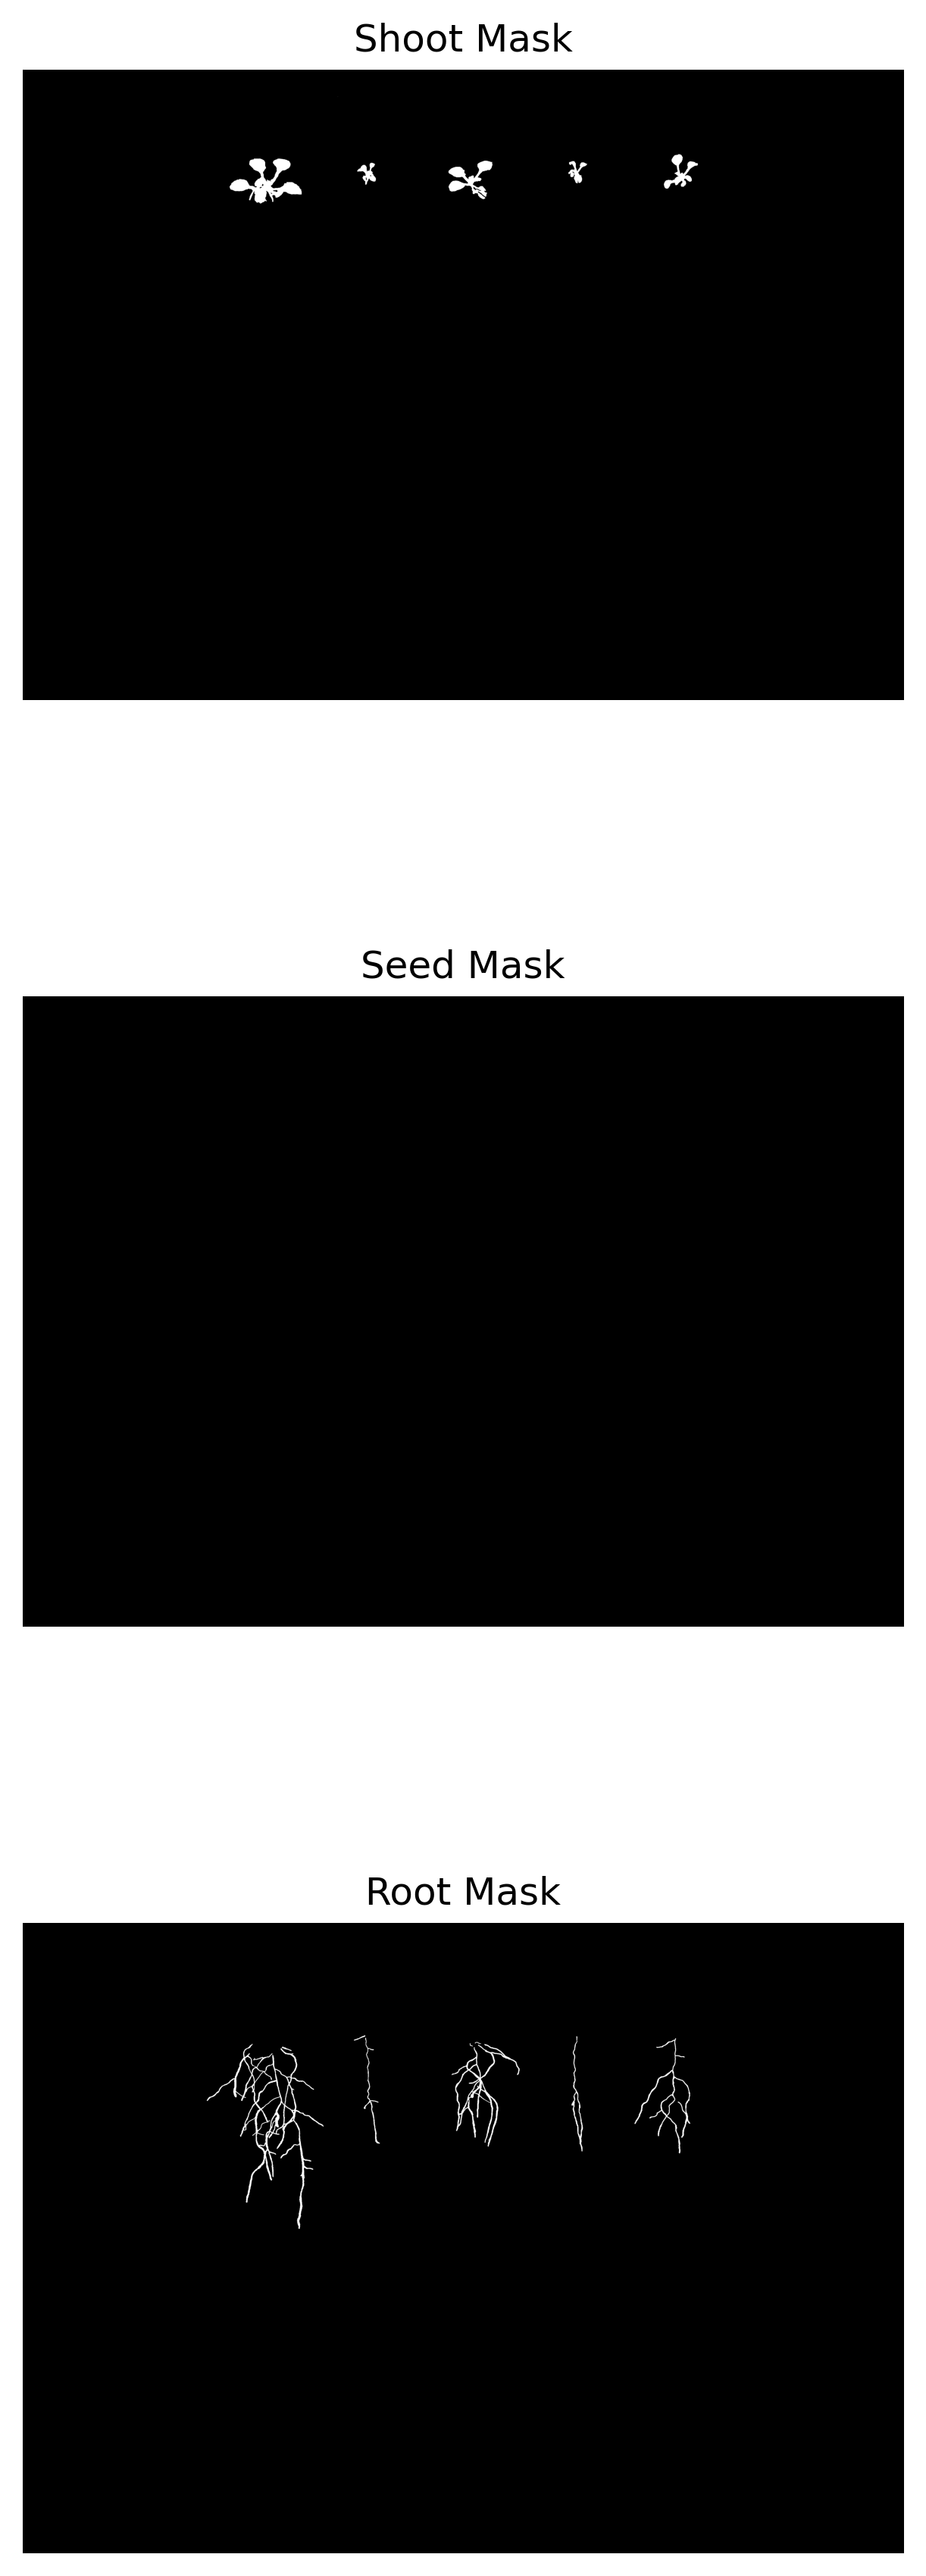

In [6]:
fig, ax = plt.subplots(3, dpi=300, figsize = (5, 15))

ax[0].imshow(shoot_mask, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Shoot Mask')

ax[1].imshow(seed_mask, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Seed Mask')

ax[2].imshow(root_mask, cmap='gray')
ax[2].axis('off')
ax[2].set_title('Root Mask')

The deliverables need to satisfy the following requirements:

###  Requirement 1

Segmentation masks should be a `.tif` file with the following naming convention:

- `name_of_the_image_shoot_mask.tif`
- `name_of_the_image_seed_mask.tif`
- `name_of_the_image_root_mask.tif`

In [7]:
# the assert statements are written assuming the image and the masks are in the same directory.
assert(image_path[:-4] + "_shoot_mask.tif" == shoot_mask_path)
assert(image_path[:-4] + "_seed_mask.tif" == seed_mask_path)
assert(image_path[:-4] + "_root_mask.tif" == root_mask_path)

### Requirement 2

Shape of the segmentation masks should be equal to the shape of the raw image assigned to you.

In [8]:
assert(im.shape == shoot_mask.shape)
assert(im.shape == seed_mask.shape)
assert(im.shape == root_mask.shape)

### Requirement 3

The masks must be binary images with pixel values 0 and 1.

- If they are not binary images, they won't be accepted.
- If they are binary images, but with pixel values 0 and 255, they won't be accepted.

In [9]:
assert(np.all(np.logical_or(shoot_mask == 0, shoot_mask == 1)))
assert(np.all(np.logical_or(seed_mask == 0, seed_mask == 1)))
assert(np.all(np.logical_or(root_mask == 0, root_mask == 1)))

### Requirement 4

Make sure that 0 represents the background and 1 represents the foreground. For example for the root mask 0 must indicate not-root pixels and 1 must indicate root pixels.

In [10]:
assert(np.sum(shoot_mask == 0) > np.sum(shoot_mask == 1))
assert(np.sum(seed_mask == 0) > np.sum(seed_mask == 1))
assert(np.sum(root_mask == 0) > np.sum(root_mask == 1))

### Requirement 5

Your labels must be "good enough". The quality of your labels will be assessed qualitatively, in comparison to the example labels provided by the domain expert. If your peers, mentors or the client detect any quality issues, you will need to fix them.

- If you have any doubts about labeling instructions, contact your mentor.
- Do not label root hairs as root.
- Make sure all root tips are labeled as accurately as possible
- Make sure that the junction between the main root and the hypocotyl is labeled as accurately as possible
- Make sure that there are no holes in your labels (unless there is an actual hole)
- Do not label occluded plant organs.
- Be careful with the borders.
- Do not miss small lateral roots.
- Do not miss ungerminated seeds.

The code below overlays the labels on to the image and saves it. Use the saved overlay to assess the quality.

- Shoot is Blue
- Seed is Green
- Root is Red

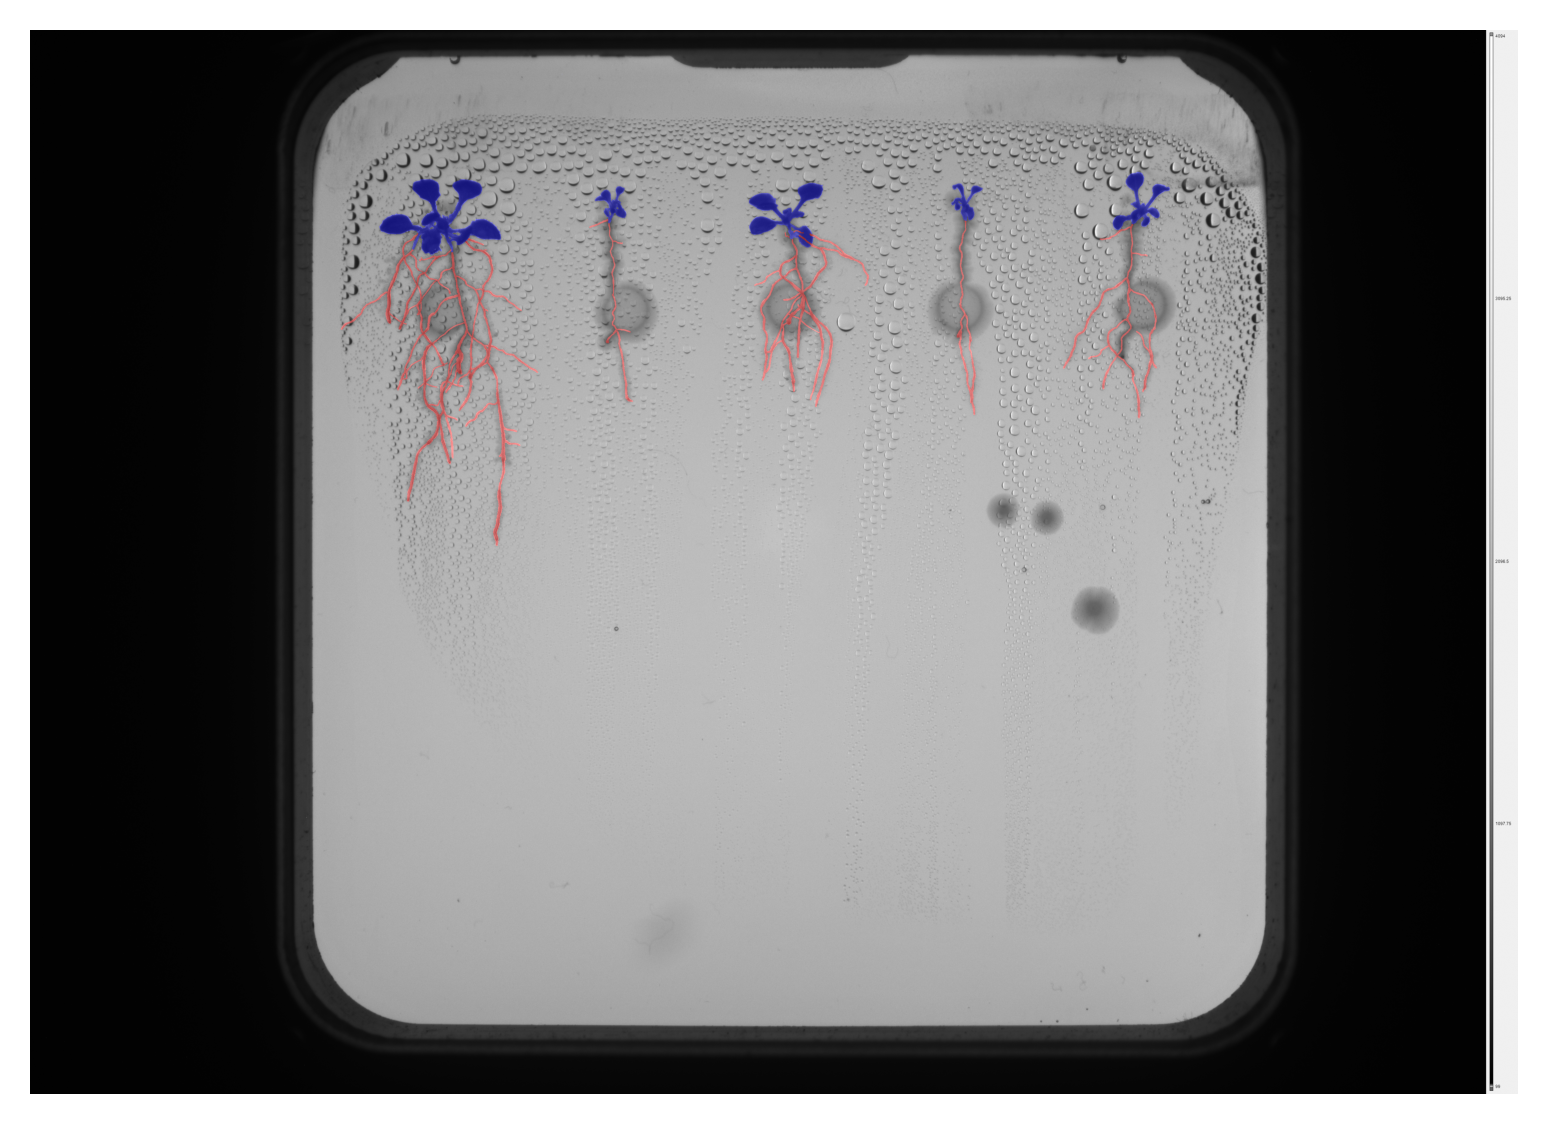

In [11]:
# FOR THIS TO WORK REQUIREMENTS 1-4 SHOULD PASS
# This might or might not work if any of the masks fail a requirement.

# Define colors for each mask
shoot_color = [0, 0, 1]  # Blue for shoot mask
seed_color = [0, 1, 0]   # Green for seed mask
root_color = [1, 0, 0]   # Red for root mask

# Create an RGB version of the grayscale image
im_rgb = np.dstack([im, im, im])

# Create overlays for each mask
overlay_shoot = np.zeros_like(im_rgb, dtype=float)
overlay_seed = np.zeros_like(im_rgb, dtype=float)
overlay_root = np.zeros_like(im_rgb, dtype=float)

# Apply color to each mask and make it transparent
alpha = 0.4  # Transparency level

overlay_shoot[shoot_mask == 1] = shoot_color
overlay_seed[seed_mask == 1] = seed_color
overlay_root[root_mask == 1] = root_color

# Combine the image and the overlays
im_overlay = im_rgb / 255.0  # Normalize image
im_overlay += alpha * overlay_shoot + alpha * overlay_seed + alpha * overlay_root
im_overlay = np.clip(im_overlay, 0, 1)  # Clip values to keep them within [0, 1]

# Plot the result
plt.figure(dpi=300)
plt.imshow(im_overlay)
plt.axis('off')
plt.imsave(f"{image_path[:-4]}_overlay.png", im_overlay)